In [1]:
import matplotlib.pyplot as plt
import numpy

Power = numpy.power
Cos = numpy.cos
Sin = numpy.sin
PI = numpy.pi
ABS = numpy.abs
Arange = numpy.arange
Grad = numpy.gradient
Atan = numpy.arctan
Floor = numpy.floor
Round = numpy.round

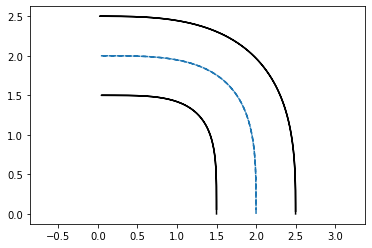

In [24]:
# Based on
# https://www.researchgate.net/publication/317794318_Sharp_bend_in_two-dimensional_optical_waveguide_based_on_gradient_refractive_index_structure
# x=rs(cos θs)2/ns  ┨ 1
# y=rs(sin θs)2/ns  ┨  1
# where rs and θs are coordinates of the super-ellipse polar co-ordinate system
#                       rs(µm)   ns
# inner boundary        r1=1.5 |  n1=4.0
# waveguide bend axis   r2=2.0 |  n2=3.5
# outer boundary        r3=2.5 |  n3=3.

r1, r2, r3 = 1.5, 2.0, 2.5
n1, n2, n3 = 4.0, 3.5, 3

x = lambda rs, ns, θs: rs * Power(ABS(Cos(θs)), 2 / ns)
y = lambda rs, ns, θs: rs * Power(ABS(Sin(θs)), 2 / ns)
θs = Arange(0, 2 * PI / 2, 0.01)

X1, Y1 = x(r1, n1, θs), y(r1, n1, θs)
X2, Y2 = x(r2, n2, θs), y(r2, n2, θs)
X3, Y3 = x(r3, n3, θs), y(r3, n3, θs)

plt.axis("equal")
plt.plot(X1, Y1, color="black")
plt.plot(X2, Y2, "--")
plt.plot(X3, Y3, color="black")

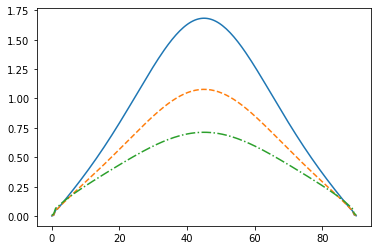

In [15]:
# The Curvature of a parametric curve can be calculated by using the equation
#  k = |x'y'' - y'x''| / |(x'^2 + y'^2)^(3/2)|
d = lambda x: Grad(x)
dd = lambda x: Grad(Grad(x))
num = lambda x, y: d(x) * dd(y) - d(y) * dd(x)
den = lambda x, y: Power(Power(d(x), 2) + Power(d(y), 2), 3 / 2)
k = lambda x, y: ABS(num(x, y) / den(x, y))

plt.plot(θs * 180 / PI, k(X1, Y1))
plt.plot(θs * 180 / PI, k(X2, Y2), "--")
plt.plot(θs * 180 / PI, k(X3, Y3), "-.")

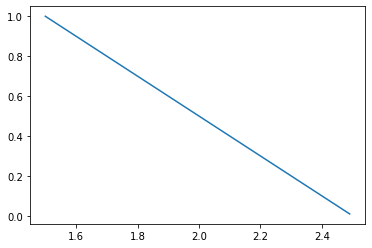

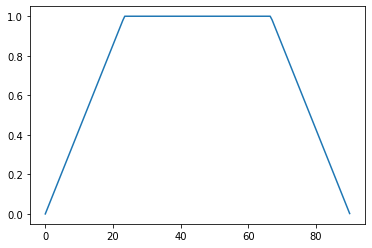

In [16]:
# Refractive index proﬁle along the super-ellipse polar co-ordinates rs, which is deﬁned as
R = lambda r1, r3, rS: (r3 - rS) / (r3 - r1)
rS = Arange(r1, r3, 0.01)
RrS = R(r1, r3, rS)

# Θ(θs) describes the refractive index proﬁle along the super-
# ellipse polar coordinates θs, which is deﬁned as
θa = 23.4 * PI / 180

Θ = (
    lambda θa, θs: θs / θa
    if (θs >= 0 and θs <= θa)
    else (
        1
        if θs >= θa and θs <= PI / 2 - θa
        else ((PI / 2 - θs) / θa if (θs >= PI / 2 - θa and θs <= PI / 2) else 0)
    )
)

Θθs = numpy.array([Θ(θa, s) for s in θs])
plt.plot(rS, RrS)
plt.show()
plt.plot(θs * 180 / PI, Θθs)

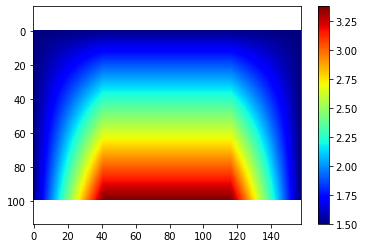

In [18]:
nMin = 1.5
nMax = 3.375
nθsrS = numpy.ones((len(RrS), len(Θθs)))

for i in range(len(RrS)):
    for j in range(0, len(Θθs)):
        nθsrS[i, j] = nMin + (nMax - nMin) * RrS[i] * Θθs[j]

nθsrS = numpy.flip(nθsrS)
plt.axis("equal")
plt.imshow(nθsrS, cmap="jet")
plt.colorbar()
plt.show()

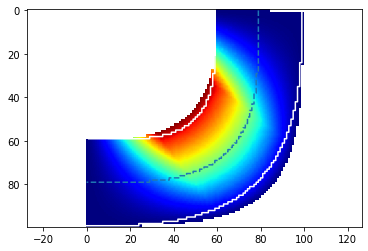

In [6]:
import seaborn
import pandas
from scipy.interpolate import interp1d

r1, r2, r3 = 1.5, 2.0, 2.5
n1, n2, n3 = 4.0, 3.5, 3
θa = 23.4 * PI / 180
nMin, nMax = 1.5, 3.375

BigΘ = (
    lambda θs: θs / θa
    if (θs >= 0 and θs <= θa)
    else (
        1
        if θs >= θa and θs <= PI / 2 - θa
        else ((PI / 2 - θs) / θa if (θs >= PI / 2 - θa and θs <= PI / 2) else 0)
    )
)

R = lambda rS: (r3 - rS) / (r3 - r1)

x = lambda rs, ns, θs: rs * Power(Cos(θs), 2 / ns)
y = lambda rs, ns, θs: rs * Power(Sin(θs), 2 / ns)
Ns = lambda r: n1 - ((n1 - n3) * (r - r3) / (r1 - r3))

θs = Arange(0, PI / 2, 0.0001)
RRs = Arange(r1, r3, 0.01)

ηxy = numpy.zeros((len(RRs), len(RRs)))
M = interp1d([0, r3], [0, len(RRs) - 1])
mapRange = lambda x: Round(M(x)).astype(int)

for Rs in RRs:
    ns, r = Ns(Rs), R(Rs)
    X, Y = x(Rs, ns, θs), y(Rs, ns, θs)
    XX, YY = mapRange(X), mapRange(Y)
    ηxy[XX, YY] = [nMin + ((nMax - nMin) * r * BigΘ(θ)) for θ in θs]

ηxy[ηxy == 0.0] = numpy.nan
plt.axis("equal")
plt.imshow(ηxy, cmap="jet")
plt.plot(mapRange(X1), mapRange(Y1), color="white")
plt.plot(mapRange(X2), mapRange(Y2), "--")
plt.plot(mapRange(X3), mapRange(Y3), color="white")